# 摩拜单车用户画像分析

## 数据维度
![](https://static.nenglipai.com.cn/boss/boss/27958407-0f0a-46ca-8d6c-a937222f5c45.png)

## 课题背景

摩拜单车，英文名mobike，是由胡玮炜创办的北京摩拜科技有限公司研发的互联网短途出行解决方案，是无桩借还车模式的智能硬件。人们通过智能手机就能快速租用和归还一辆摩拜单车，用可负担的价格来完成一次几公里的市内骑行。 

由于一公里的出行是一个高频的需求场景，所以mobike单车累计了大量的用户基本信息以及骑行的数据，通过这些数据，能够帮助企业更好识别自己的客群画像和他们的骑行偏好。

## 任务说明
本周你的任务就是根据用户的基本信息以及骑行的数据，完成以下事项：

• 使用Python建立聚类分析模型

• 对于聚类分析模型得出的分群特征进行解读 

# 代码实现

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mobike = pd.read_csv('week4.mobike.csv',index_col = 0)

## 数据概览

In [3]:
mobike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [4]:
mobike.shape

(6427, 14)

In [5]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            6427 non-null   int64  
 1   start_time         6427 non-null   object 
 2   end_time           6427 non-null   object 
 3   timeduration       6427 non-null   int64  
 4   bikeid             6427 non-null   int64  
 5   tripduration       6427 non-null   int64  
 6   from_station_id    6427 non-null   int64  
 7   from_station_name  6427 non-null   object 
 8   to_station_id      6427 non-null   int64  
 9   to_station_name    6427 non-null   object 
 10  usertype           6427 non-null   object 
 11  gender             5938 non-null   object 
 12  birthyear          5956 non-null   float64
 13  age                6427 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 753.2+ KB


- 数据类型错误：age

In [6]:
# 缺失情况
mobike.isna().sum() / mobike.shape[0]

user_id              0.000000
start_time           0.000000
end_time             0.000000
timeduration         0.000000
bikeid               0.000000
tripduration         0.000000
from_station_id      0.000000
from_station_name    0.000000
to_station_id        0.000000
to_station_name      0.000000
usertype             0.000000
gender               0.076085
birthyear            0.073285
age                  0.000000
dtype: float64

- gender，birthyear 中含有缺失值

In [7]:
# 数据类型转化
mobike['age'] = mobike['age'].astype(int)

ValueError: invalid literal for int() with base 10: ' '

- 转化报错，数据行中存在‘’

In [8]:
# 查看数据情况
mobike['age'].unique()

# 将‘ ’先替换为0
mobike.age = mobike.age.str.replace(' ','0').astype(int)

In [9]:
# 将0值替换为均值

mobike.age = mobike.age.replace(0,int(mobike.age.mean()))

In [10]:
mobike.age.unique()

array([ 37,  31,  30,  40,  25,  48,  33,  28,  27,  34,  26,  20,  23,
        55,  22,  54,  52,  57,  29,  39,  51,  32,  49,  43,  58,  42,
        61,  35,  41,  63,  50,  38,  36,  44,  62,  19,  59,  45,  46,
        56,  21,  24,  47,  66,  64,  77,  69,  60,  68,  70,  53, 113,
        73,  18,  67,  65,  71,  79,  17, 101,  74,  72])

- 重新通过unique()函数观察发现，原本的0值已经被替换为33

In [11]:
mobike.describe()

,user_id,timeduration,bikeid,tripduration,from_station_id,to_station_id,birthyear,age
count,6.427000e+03,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,5956.000000,6427.000000
mean,2.135519e+07,11.778902,3491.637934,1.060471e+03,195.038432,198.502567,1982.488583,36.254084
std,2.181294e+05,9.692236,1912.171846,1.456811e+04,148.170025,148.939873,11.147859,10.770489
min,2.098358e+07,0.000000,2.000000,6.100000e+01,2.000000,2.000000,1906.000000,17.000000
25%,2.116805e+07,5.000000,1852.000000,3.490000e+02,77.000000,80.000000,1977.000000,29.000000
50%,2.135114e+07,9.000000,3618.000000,5.590000e+02,168.000000,172.000000,1986.000000,33.000000
75%,2.154376e+07,15.000000,5179.500000,9.320000e+02,287.000000,287.000000,1991.000000,41.000000
max,2.174223e+07,59.000000,6470.000000,1.139070e+06,662.000000,661.000000,2002.000000,113.000000


- tripduration的最大值为1.139e+06，较大可能为异常值
- age的最大值为113，异常值的可能性较大，可在后续的分析中设为离群值

## EDA

### 开始/结束时间格式转换

In [12]:
mobike['start_time']=pd.to_datetime(mobike['start_time'])
mobike['end_time']=pd.to_datetime(mobike['end_time'])

In [13]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6427 non-null   int64         
 1   start_time         6427 non-null   datetime64[ns]
 2   end_time           6427 non-null   datetime64[ns]
 3   timeduration       6427 non-null   int64         
 4   bikeid             6427 non-null   int64         
 5   tripduration       6427 non-null   int64         
 6   from_station_id    6427 non-null   int64         
 7   from_station_name  6427 non-null   object        
 8   to_station_id      6427 non-null   int64         
 9   to_station_name    6427 non-null   object        
 10  usertype           6427 non-null   object        
 11  gender             5938 non-null   object        
 12  birthyear          5956 non-null   float64       
 13  age                6427 non-null   int64         
dtypes

In [14]:
mobike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,2018-11-14 07:37:00,2018-11-14 07:44:00,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,2018-12-18 19:02:00,2018-12-18 19:10:00,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,2018-10-09 12:37:00,2018-10-09 12:55:00,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,2018-11-12 12:30:00,2018-11-12 12:40:00,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,2018-11-07 07:29:00,2018-11-07 07:35:00,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [15]:
# 观察日期信息分布
print(mobike.start_time.apply(lambda x: x.year).unique())
print(mobike.start_time.apply(lambda x: x.month).unique())
print(mobike.start_time.apply(lambda x: x.day).unique())

[2018]
[11 12 10]
[14 18  9 12  7  6 29  3 31 23 11  1  2 10 15  8 20 27 17  4 21 26 22 16
 19  5 30 24 28 13 25]


- 通过对开始时间的观察，我们注意到数据的时间主要是18年10月到18年12月

In [16]:
# 添加月，日，小时字段
mobike['month'] = mobike.start_time.apply(lambda x: x.month)
mobike['day'] = mobike.start_time.apply(lambda x: x.day)
mobike['hour'] = mobike.start_time.apply(lambda x: x.hour)

In [17]:
# 移除原本的时间列
mobike = mobike.drop(['start_time','end_time'],axis = 1 )

In [18]:
# 重新查看数据表
mobike.head()

,user_id,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,month,day,hour
439283,21499218,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37,11,14,7
603317,21694389,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31,12,18,19
109957,21110722,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30,10,9,12
428082,21485409,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30,11,12,12
395437,21445994,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40,11,7,7


### timeduration

<AxesSubplot:xlabel='timeduration'>

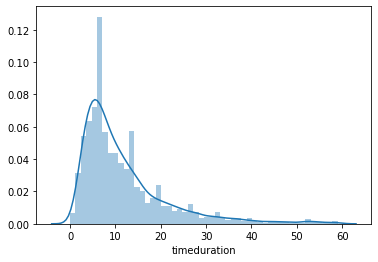

In [19]:
# 绘制直方图观察骑行时长分布
sns.distplot(mobike.timeduration)

<AxesSubplot:ylabel='timeduration'>

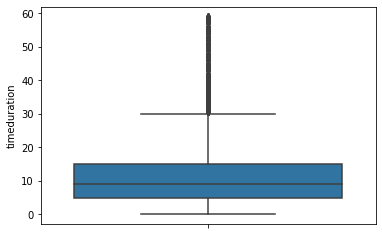

In [20]:
# 绘制箱型图查看骑行时长的离群值
sns.boxplot(y = 'timeduration',data = mobike)

- 通过箱型图我们可以看出数据中存在较多的离群值

### usertype

<AxesSubplot:ylabel='usertype'>

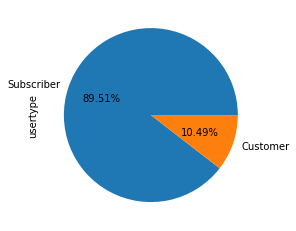

In [21]:
# 绘制饼图观察用户类型分布
mobike.usertype.value_counts().plot.pie(autopct = '%1.2f%%')

- 我们发现将近90%的用户为会员

### age

<AxesSubplot:xlabel='age'>

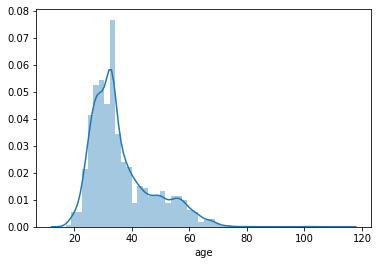

In [22]:
# 绘制直方图观察用户年龄分布
sns.distplot(mobike.age)

<AxesSubplot:ylabel='age'>

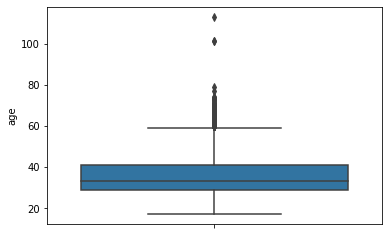

In [23]:
# 绘制箱型图查看用户年龄的离群值
sns.boxplot(y = 'age', data = mobike)

- 我们认定超过75%分位数 1.5倍的四分位差的数值为离群值

In [24]:
age_diff = mobike.age.describe()['75%'] - mobike.age.describe()['25%']
age_max = mobike.age.describe()['75%'] + 1.5 * age_diff
age_max

59.0

In [25]:
# 清洗age中的离群值
mobike = mobike[mobike.age <= 59.0]

### gender

<AxesSubplot:ylabel='gender'>

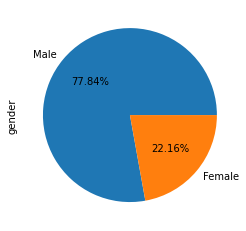

In [26]:
# 通过饼图查看用户性别的分布
mobike.gender.value_counts().plot.pie(autopct = '%1.2f%%')

- 通过饼图我们可以看出，主要的用户为男性，占了总用户的77.84%，而女性用户只占了22.16%

### month/day/hour

<AxesSubplot:xlabel='month', ylabel='count'>

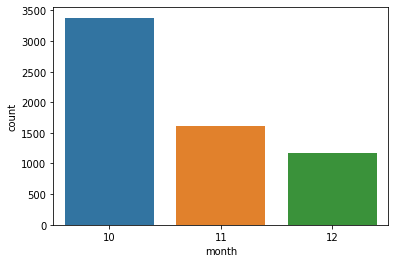

In [27]:
# 月份分布
sns.countplot(mobike.month)

- 数据表中10月份的数据最多，超过了总数据的一半

<AxesSubplot:xlabel='day', ylabel='count'>

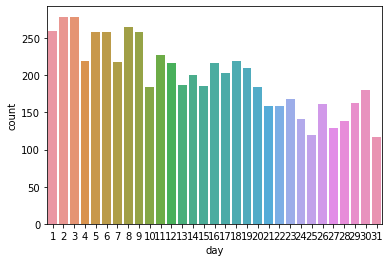

In [28]:
# 日期分布
sns.countplot(mobike.day)

- 我们发现月初的使用数据相较而言更多，并且随着时间推进有下降的趋势

<AxesSubplot:xlabel='hour', ylabel='count'>

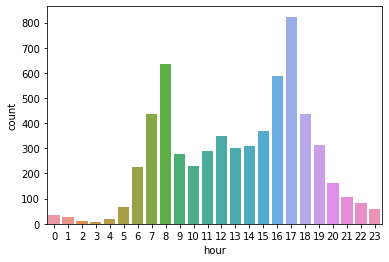

In [29]:
# 时间分布
sns.countplot(mobike.hour)

- 我们发现主要时间集中在早高峰（7am - 8am）和晚高峰（4pm - 5pm）

### tripduration

<AxesSubplot:xlabel='tripduration'>

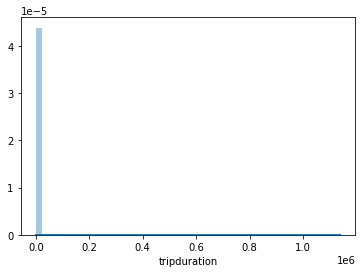

In [30]:
# 使用直方图观察数据的分布
sns.distplot(mobike.tripduration)

- 因为存在异常值，直方图效果较差无法看出数据分布

<AxesSubplot:ylabel='tripduration'>

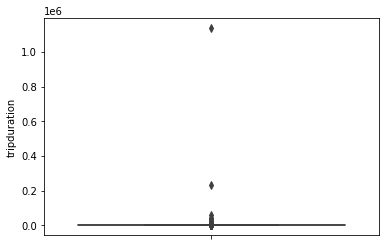

In [31]:
# 使用箱型图观察数据
sns.boxplot(y = mobike.tripduration)

- 同样的，箱型图的效果也很差，于是我们接下来进行离群值的筛选和清洗

In [32]:
tripduration_diff = mobike.tripduration.describe()['75%']-mobike.tripduration.describe()['25%']
tripduration_max = mobike.tripduration.describe()['75%'] + 1.5 * tripduration_diff
tripduration_max

1818.0

In [33]:
# 清洗离群值
mobike = mobike[mobike.tripduration <= 1818.0]

<AxesSubplot:xlabel='tripduration'>

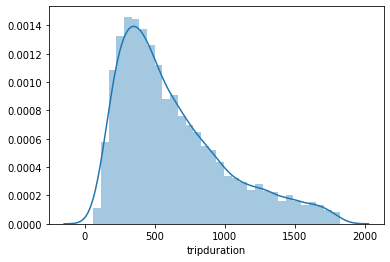

In [34]:
# 重新绘制直方图
sns.distplot(mobike.tripduration)

- 可以看出多数骑行距离在400左右

<AxesSubplot:ylabel='tripduration'>

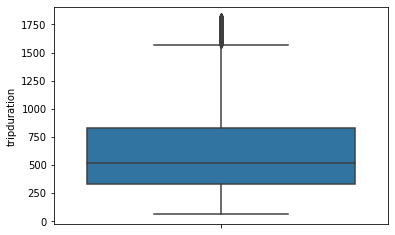

In [35]:
# 重新绘制箱型图
sns.boxplot(y = mobike.tripduration)

## 各特征间关系

### 数值变量

In [36]:
mobike[['timeduration','tripduration','age','month','day','hour']].corr()

,timeduration,tripduration,age,month,day,hour
timeduration,1.000000,0.998955,0.031513,-0.082266,-0.028260,0.039134
tripduration,0.998955,1.000000,0.030883,-0.083136,-0.027291,0.038850
age,0.031513,0.030883,1.000000,0.068443,0.012702,-0.075024
month,-0.082266,-0.083136,0.068443,1.000000,-0.081067,-0.034693
day,-0.028260,-0.027291,0.012702,-0.081067,1.000000,0.012975
hour,0.039134,0.038850,-0.075024,-0.034693,0.012975,1.000000


### 分类变量

In [37]:
categorical_features = ['gender', 'usertype']

## 特征变换

In [38]:
# 删掉不需要的变量
mobike_clean = mobike.drop(['user_id','bikeid','from_station_id','from_station_name','to_station_id','to_station_name','birthyear'],axis = 1)

In [39]:
# 特征变换
mobike_clean = pd.get_dummies(mobike_clean,drop_first=True)

In [40]:
# 查看数据表结构
mobike_clean.head()

,timeduration,tripduration,age,month,day,hour,usertype_Subscriber,gender_Male
439283,7,436,37,11,14,7,1,1
603317,7,445,31,12,18,19,1,1
109957,18,1090,30,10,9,12,0,1
428082,9,581,30,11,12,12,1,0
395437,6,390,40,11,7,7,1,1


In [41]:
# 数据标准化
from sklearn.preprocessing import scale
x = pd.DataFrame(scale(mobike_clean))

In [42]:
#建立聚类分析模型，创建3个群 
from sklearn import cluster
model=cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [43]:
mobike_clean['cluster']=model.labels_
#查看模型前20行数据
mobike_clean.head(20)

,timeduration,tripduration,age,month,day,hour,usertype_Subscriber,gender_Male,cluster
439283,7,436,37,11,14,7,1,1,1
603317,7,445,31,12,18,19,1,1,1
109957,18,1090,30,10,9,12,0,1,0
428082,9,581,30,11,12,12,1,0,1
395437,6,390,40,11,7,7,1,1,1
73632,12,772,25,10,6,12,1,1,2
317778,8,505,48,10,29,17,1,0,1
371796,22,1347,33,11,3,16,0,0,0
333577,13,819,28,10,31,6,1,1,2
261523,3,225,30,10,23,18,1,1,1


In [44]:
mobike_clean['cluster']=mobike_clean['cluster'].apply(lambda x:str(x)) 

<AxesSubplot:xlabel='age', ylabel='tripduration'>

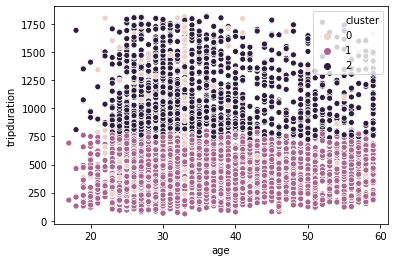

In [45]:
sns.scatterplot(x= 'age', y='tripduration',hue='cluster',
                data=mobike_clean)

- 我们可以看出散点图的分群还是较为明显的

In [47]:
# 查看age的分群效果
mobike_clean.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,32.793503,5.486690,19.0,33.0,33.0,33.0,59.0
1,3851.0,35.030382,9.448280,17.0,28.0,33.0,40.0,59.0
2,1441.0,35.845940,9.483238,18.0,29.0,33.0,41.0,59.0


- age的分群效果一般，三个群在age的变量上没有区分，最小值为17-19，最大值为59

In [48]:
# 查看tripduration的分群效果
mobike_clean.groupby(['cluster'])['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,973.331787,435.612644,231.0,610.0,951.0,1328.0,1815.0
1,3851.0,414.530512,167.306437,61.0,280.0,402.0,540.0,817.0
2,1441.0,1093.233171,278.486744,675.0,865.0,1015.0,1273.0,1818.0


- tripduration的分群效果较好，三个群在tripduration的变量上有了区分
- 0群和2群的最小值为610/865，最大值为1815/1818
- 1群的最小值为61，最大值为817

In [55]:
# 查看hour的分群效果
mobike_clean.groupby(['cluster'])['hour'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,13.993039,4.175504,0.0,12.0,14.0,17.0,23.0
1,3851.0,13.076863,4.816348,0.0,8.0,14.0,17.0,23.0
2,1441.0,13.602359,4.713099,0.0,9.0,15.0,17.0,23.0


In [53]:
# 查看day的分群效果
mobike_clean.groupby(['cluster'])['day'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,13.890951,8.515359,1.0,7.0,13.0,20.5,31.0
1,3851.0,14.351857,8.815987,1.0,7.0,13.0,21.0,31.0
2,1441.0,13.780014,8.892930,1.0,6.0,13.0,20.0,31.0


In [56]:
# 查看gender的分群效果
mobike_clean.groupby(['cluster'])['gender_Male'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,0.248260,0.432505,0.0,0.0,0.0,0.0,1.0
1,3851.0,0.799792,0.400208,0.0,1.0,1.0,1.0,1.0
2,1441.0,0.718945,0.449670,0.0,0.0,1.0,1.0,1.0


In [57]:
# 查看subscriber的分群效果
mobike_clean.groupby(['cluster'])['usertype_Subscriber'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3851.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1441.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [58]:
# 查看month的分群效果
mobike_clean.groupby(['cluster'])['month'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,10.380510,0.649859,10.0,10.0,10.0,11.0,12.0
1,3851.0,10.721111,0.798127,10.0,10.0,11.0,11.0,12.0
2,1441.0,10.566967,0.753597,10.0,10.0,10.0,11.0,12.0


- 我们发现month，day，hour，gender的分群效果都不好
- subscriber的分群效果较好，0群subscriber为0，而1群和2群subscriber为1

In [69]:
#计算轮廓系数
from sklearn import metrics
x_cluster=model.fit_predict(x)
score=metrics.silhouette_score(x,x_cluster)
print(score)

0.21992396845520049


- 轮廓系数仅为0.220，聚合效果较差，我们接着对模型进行优化

## 优化

### 年龄分箱

In [72]:
# 查看年龄分布
mobike_clean.age.describe()

count    5723.000000
mean       35.067272
std         9.246735
min        17.000000
25%        28.000000
50%        33.000000
75%        40.000000
max        59.000000
Name: age, dtype: float64

In [78]:
# 设置分箱
bins = [0,30,50,60]
age_cut = pd.cut(mobike_clean.age,bins,labels = ['青年','中年','老年'])

439283    中年
603317    中年
109957    青年
428082    青年
395437    中年
          ..
186995    中年
260464    青年
182777    中年
606080    中年
278179    青年
Name: age, Length: 5723, dtype: category
Categories (3, object): ['青年' < '中年' < '老年']

In [87]:
# 创建新的数据
mobike_revise = mobike_clean.copy().drop('cluster',axis = 1)
# 将分箱和数据结合
mobike_revise.age = age_cut

In [88]:
# 特征变量转化
mobike_revise = pd.get_dummies(mobike_revise,drop_first = True)
# 观察数据
mobike_revise.head()

,timeduration,tripduration,month,day,hour,usertype_Subscriber,gender_Male,age_中年,age_老年
439283,7,436,11,14,7,1,1,1,0
603317,7,445,12,18,19,1,1,1,0
109957,18,1090,10,9,12,0,1,0,0
428082,9,581,11,12,12,1,0,0,0
395437,6,390,11,7,7,1,1,1,0


In [89]:
# 数据标准化
x1 = pd.DataFrame(scale(mobike_revise))
# 建立聚类模型
model_revise=cluster.KMeans(n_clusters=3,random_state=10)
model_revise.fit(x1)

KMeans(n_clusters=3, random_state=10)

In [90]:
mobike_revise['cluster']=model_revise.labels_
#查看模型前20行数据
mobike_revise.head(20)

,timeduration,tripduration,month,day,hour,usertype_Subscriber,gender_Male,age_中年,age_老年,cluster
439283,7,436,11,14,7,1,1,1,0,1
603317,7,445,12,18,19,1,1,1,0,1
109957,18,1090,10,9,12,0,1,0,0,2
428082,9,581,11,12,12,1,0,0,0,1
395437,6,390,11,7,7,1,1,1,0,1
73632,12,772,10,6,12,1,1,0,0,1
317778,8,505,10,29,17,1,0,1,0,1
371796,22,1347,11,3,16,0,0,1,0,2
333577,13,819,10,31,6,1,1,0,0,1
261523,3,225,10,23,18,1,1,0,0,1


In [96]:
# 查看age的分群效果
mobike_revise.groupby(['cluster'])['age_中年','age_老年'].describe()

<ipython-input-96-4aa0dfc8ba18>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mobike_revise.groupby(['cluster'])['age_中年','age_老年'].describe()


age_中年                                               age_老年  \
          count      mean       std  min  25%  50%  75%  max   count   
cluster                                                                
0         539.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   539.0   
1        3833.0  0.545265  0.498012  0.0  0.0  1.0  1.0  1.0  3833.0   
2        1351.0  0.704663  0.456363  0.0  0.0  1.0  1.0  1.0  1351.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2        0.002221  0.047088  0.0  0.0  0.0  0.0  1.0

- 我们看到age的分群效果较好
- 0群都为老年，而1群和2群则为老年和青年

In [97]:
#计算轮廓系数
score_revise = metrics.silhouette_score(x1, mobike_revise.cluster)
print(score_revise)

0.25265427498036375


- 轮廓系数得到了提升，优化后的模型轮廓系数为0.253，但效果依然不是很好

### 提升群数

In [101]:
# 将群数提升为5后建立聚类模型
model_revise1=cluster.KMeans(n_clusters=5,random_state=10)
model_revise1.fit(x1)
mobike_revise1 = mobike_revise.copy()
mobike_revise1['cluster']=model_revise1.labels_
mobike_revise1.head()

,timeduration,tripduration,month,day,hour,usertype_Subscriber,gender_Male,age_中年,age_老年,cluster
439283,7,436,11,14,7,1,1,1,0,0
603317,7,445,12,18,19,1,1,1,0,0
109957,18,1090,10,9,12,0,1,0,0,1
428082,9,581,11,12,12,1,0,0,0,4
395437,6,390,11,7,7,1,1,1,0,0


In [102]:
# 查看age的分群效果
mobike_revise1.groupby(['cluster'])['age_中年','age_老年'].describe()

<ipython-input-102-ad903dceaa99>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mobike_revise1.groupby(['cluster'])['age_中年','age_老年'].describe()


age_中年                                               age_老年  \
          count      mean       std  min  25%  50%  75%  max   count   
cluster                                                                
0        2045.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  2045.0   
1         426.0  0.802817  0.398340  0.0  1.0  1.0  1.0  1.0   426.0   
2         991.0  0.660949  0.473626  0.0  0.0  1.0  1.0  1.0   991.0   
3         537.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   537.0   
4        1724.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  1724.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
1        0.011737  0.107827  0.0  0.0  0.0  0.0  1.0  
2        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
3        1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
4        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

In [107]:
# 查看gender的分群效果
mobike_revise1.groupby(['cluster'])['gender_Male'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2045.0,0.822494,0.382190,0.0,1.0,1.0,1.0,1.0
1,426.0,0.239437,0.427241,0.0,0.0,0.0,0.0,1.0
2,991.0,0.734612,0.441763,0.0,0.0,1.0,1.0,1.0
3,537.0,0.795158,0.403962,0.0,1.0,1.0,1.0,1.0
4,1724.0,0.744780,0.436112,0.0,0.0,1.0,1.0,1.0


In [108]:
# 查看month的分群效果
mobike_revise1.groupby(['cluster'])['month'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2045.0,10.737408,0.805433,10.0,10.0,11.0,11.0,12.0
1,426.0,10.382629,0.651932,10.0,10.0,10.0,11.0,12.0
2,991.0,10.589304,0.766632,10.0,10.0,10.0,11.0,12.0
3,537.0,10.776536,0.811743,10.0,10.0,11.0,11.0,12.0
4,1724.0,10.629930,0.766347,10.0,10.0,10.0,11.0,12.0


In [109]:
# 查看day的分群效果
mobike_revise1.groupby(['cluster'])['day'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2045.0,14.642054,8.860022,1.0,7.0,14.0,22.0,31.0
1,426.0,13.873239,8.508149,1.0,7.0,13.0,20.0,31.0
2,991.0,13.601413,8.881348,1.0,6.0,13.0,20.0,31.0
3,537.0,14.229050,8.746089,1.0,6.0,14.0,21.0,31.0
4,1724.0,14.002320,8.802205,1.0,6.0,13.0,21.0,31.0


In [110]:
# 查看hour的分群效果
mobike_revise1.groupby(['cluster'])['hour'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2045.0,12.931051,4.711816,0.0,8.0,14.0,17.0,23.0
1,426.0,14.018779,4.178333,0.0,12.0,14.0,17.0,23.0
2,991.0,13.620585,4.742388,0.0,9.0,15.0,17.0,23.0
3,537.0,12.513966,4.617889,0.0,8.0,13.0,16.0,23.0
4,1724.0,13.548144,4.924915,0.0,9.0,14.0,17.0,23.0


In [112]:
# 查看usertype的分群效果
mobike_revise1.groupby(['cluster'])['usertype_Subscriber'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2045.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,426.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,991.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3,537.0,0.990689,0.096133,0.0,1.0,1.0,1.0,1.0
4,1724.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [113]:
# 查看tripduration的分群效果
mobike_revise1.groupby(['cluster'])['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2045.0,437.571149,181.278938,61.0,295.0,418.0,568.00,899.0
1,426.0,977.786385,435.702709,231.0,616.5,961.5,1333.25,1815.0
2,991.0,1181.975782,263.447707,750.0,959.5,1127.0,1360.00,1818.0
3,537.0,618.003724,349.175292,114.0,359.0,545.0,784.00,1765.0
4,1724.0,450.484919,206.006658,67.0,280.0,419.0,605.50,899.0


- 我们发现month/day/hour/gender的分群效果依然不好

In [115]:
#计算轮廓系数
score_revise1 = metrics.silhouette_score(x1, mobike_revise1.cluster)
print(score_revise1)

0.2064843218692837


- 增加了群数之后，轮廓系数反而下降了

### 调整变量

我们尝试将month/day/hour/gender这四个变量剔除

因为tripduration和timeduration有很强的相关性(>0.998)，我们认为在拟合的时候这两个变量会提供重复的信息，所以决定将timeduration也剔除

In [119]:
# 剔除多余变量
mobike_revise2 = mobike_revise1.drop(['month','day','hour','gender_Male','timeduration','cluster'],axis = 1)
mobike_revise2.head()

,tripduration,usertype_Subscriber,age_中年,age_老年
439283,436,1,1,0
603317,445,1,1,0
109957,1090,0,0,0
428082,581,1,0,0
395437,390,1,1,0


In [120]:
# 数据标准化
x2 = pd.DataFrame(scale(mobike_revise2))
# 建立聚类模型
model_revise2=cluster.KMeans(n_clusters=3,random_state=10)
model_revise2.fit(x2) 

KMeans(n_clusters=3, random_state=10)

In [121]:
mobike_revise2['cluster'] = model_revise2.labels_

In [123]:
#计算轮廓系数
score_revise2 = metrics.silhouette_score(x2, mobike_revise2.cluster)
print(score_revise2)

0.5874426524187609


- 我们发现在对变量进行调整之后，模型的效果有了显著的提升，轮廓系数增加到了0.587

In [124]:
# 我们再次尝试改变群数建立新的模型
model_revise3=cluster.KMeans(n_clusters=5,random_state=10)
model_revise3.fit(x2) 
mobike_revise3 = mobike_revise2.copy()
mobike_revise3['cluster'] = model_revise3.labels_
#计算轮廓系数
score_revise3 = metrics.silhouette_score(x2, mobike_revise3.cluster)
print(score_revise3)

0.6234058363056888


- 可以看出，当我们把群数提升到5后，轮廓系数增加到了0.623，相较于一开始我们的得到了较好的聚类模型

## 模型解读

In [126]:
centers = pd.DataFrame(model_revise3.cluster_centers_)
centers

,0,1,2,3
0,-0.026495,0.250100,-1.065200,3.091770
1,1.623242,0.285383,0.380010,-0.323439
2,0.916532,-3.504058,0.543638,-0.283355
3,-0.375413,0.285383,-1.065200,-0.323439
4,-0.453398,0.285383,0.938791,-0.323439


- 0群众中多为老年人，不含中年人
- 1群中骑行路程都比较长
- 2群中都为非会员用户
- 3群中多为青年人
- 4群中多为中年人